# Liberías

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import NearestCentroid 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from keras.optimizers import RMSprop
# from keras.constraints import maxnorm

In [2]:
import tensorflow as tf
from tensorflow.python.keras.backend import set_session 

# Create a ConfigProto object
config = tf.compat.v1.ConfigProto()

# Set GPU options
config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU

# Log device placement
config.log_device_placement = True  # to log device placement (on which device the operation ran)

# Create a session with the specified configuration
sess = tf.compat.v1.Session(config=config)

# Set this session in the backend
set_session(sess)


Device mapping: no known devices.


# Lectura de datos

In [3]:
data = pd.read_csv('C:/Users/ASUS/Documents/Data mining/splited_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train  = data
train

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
102497,2010-03-16,Netherlands,cereals and bakery products,food,undecided,withdrawal from the market,distribution on the market (possible),genetically modified food or feed,China,Sweden,
96857,2011-01-06,Denmark,cereals and bakery products,food,undecided,public warning - press release,distribution on the market (possible),mycotoxins,Denmark,Denmark,
95463,2011-03-09,Ireland,cereals and bakery products,food,undecided,(obsolete),no distribution,composition,China,,Ireland
4604,2019-05-02,Netherlands,"nuts, nut products and seeds",food,serious,physical/chemical treatment,product not (yet) placed on the market,mycotoxins,Argentina,,Netherlands
14378,2018-08-31,Austria,fruits and vegetables,food,serious,public warning - press release,distribution to other member countries,composition,South Korea,Czech Republic,INFOSAN
...,...,...,...,...,...,...,...,...,...,...,...
80948,2012-10-09,Italy,cereals and bakery products,food,not serious,import not authorised,no distribution,composition,China,,Italy
62116,2014-08-26,Germany,"dietetic foods, food supplements, fortified foods",food,undecided,no action taken,distribution to other member countries,composition,United States,Moldova,Commission Services
23893,2018-02-09,Netherlands,other food product / mixed,food,undecided,informing recipient(s),distribution to other member countries,labelling absent/incomplete/incorrect,Hong Kong,Sweden,Commission Services
94849,2011-03-29,Belgium,compound feeds,feed,undecided,withdrawal from the market,distribution to other member countries,metals,Japan,Netherlands,


# Features

In [4]:
features = [0,1,6,8]
target = [2]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [5]:
X 

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
102497,2010-03-16,Netherlands,distribution on the market (possible),China
96857,2011-01-06,Denmark,distribution on the market (possible),Denmark
95463,2011-03-09,Ireland,no distribution,China
4604,2019-05-02,Netherlands,product not (yet) placed on the market,Argentina
14378,2018-08-31,Austria,distribution to other member countries,South Korea
...,...,...,...,...
80948,2012-10-09,Italy,no distribution,China
62116,2014-08-26,Germany,distribution to other member countries,United States
23893,2018-02-09,Netherlands,distribution to other member countries,Hong Kong
94849,2011-03-29,Belgium,distribution to other member countries,Japan


In [6]:
y

,PROD_CAT
102497,cereals and bakery products
96857,cereals and bakery products
95463,cereals and bakery products
4604,"nuts, nut products and seeds"
14378,fruits and vegetables
...,...
80948,cereals and bakery products
62116,"dietetic foods, food supplements, fortified foods"
23893,other food product / mixed
94849,compound feeds


# Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Para probar codificaciones (opcional)

In [8]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2)

# Árboles de decisión

In [10]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.99      0.87      0.93        93
                  animal by-products - (obsolete)       1.00      0.82      0.90        11
                    animal nutrition - (obsolete)       0.86      0.79      0.82       138
            bivalve molluscs and products thereof       0.84      0.80      0.82       490
                 cephalopods and products thereof       0.78      0.68      0.72       164
                      cereals and bakery products       0.83      0.83      0.83      1369
     cocoa and cocoa preparations, coffee and tea       0.94      0.87      0.91       644
                                   compound feeds       0.96      0.91      0.93       196
                                    confectionery       0.89      0.83      0.86       548
                 crustaceans and products thereof       0.76      0.74      0.75       47

In [13]:
clf.score(X_test, y_test)

0.8679785204550272

# Random Forest

In [14]:
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [15]:
y_pred = clf.predict(X_test)

In [16]:
y_pred

array(['milk and milk products', 'nuts, nut products and seeds',
       'food contact materials', ..., 'fruits and vegetables',
       'prepared dishes and snacks', 'fish and fish products'],
      dtype=object)

In [17]:
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.99      0.87      0.93        93
                  animal by-products - (obsolete)       1.00      0.91      0.95        11
                    animal nutrition - (obsolete)       0.87      0.79      0.83       138
            bivalve molluscs and products thereof       0.83      0.78      0.81       490
                 cephalopods and products thereof       0.81      0.66      0.73       164
                      cereals and bakery products       0.85      0.82      0.83      1369
     cocoa and cocoa preparations, coffee and tea       0.92      0.88      0.90       644
                                   compound feeds       0.96      0.90      0.93       196
                                    confectionery       0.90      0.83      0.86       548
                 crustaceans and products thereof       0.77      0.74      0.75       47

In [18]:
clf.score(X_test, y_test)

0.871016745566311

# Gaussian naive Bayes clasiffier

In [19]:
print(X_one_hot.shape)
print(y.shape)

(141529, 4222)
(141529, 1)


In [20]:
clf = GaussianNB()
clf = clf.fit(X_train.toarray(),y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y_pred = clf.predict(X_test.toarray())

In [22]:
print(classification_report(y_test,y_pred))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.26      0.89      0.40        93
                  animal by-products - (obsolete)       0.26      0.82      0.39        11
                    animal nutrition - (obsolete)       0.24      0.80      0.37       138
            bivalve molluscs and products thereof       0.13      0.25      0.17       490
                 cephalopods and products thereof       0.07      0.55      0.13       164
                      cereals and bakery products       0.20      0.10      0.13      1369
     cocoa and cocoa preparations, coffee and tea       0.15      0.39      0.22       644
                                   compound feeds       0.18      0.91      0.29       196
                                    confectionery       0.13      0.30      0.18       548
                 crustaceans and products thereof       0.11      0.23      0.15       47

In [23]:
clf.score(X_test.toarray(), y_test)

0.1954355966932806

# Regresión logística

In [24]:
clf = LogisticRegression()
clf = clf.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
y_pred = clf.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.93      0.57      0.71        93
                  animal by-products - (obsolete)       0.00      0.00      0.00        11
                    animal nutrition - (obsolete)       0.85      0.63      0.72       138
            bivalve molluscs and products thereof       0.59      0.42      0.49       490
                 cephalopods and products thereof       0.67      0.20      0.30       164
                      cereals and bakery products       0.55      0.59      0.57      1369
     cocoa and cocoa preparations, coffee and tea       0.70      0.59      0.64       644
                                   compound feeds       0.92      0.66      0.77       196
                                    confectionery       0.66      0.49      0.57       548
                 crustaceans and products thereof       0.54      0.41      0.47       47

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
clf.score(X_test, y_test)

0.6660778633505264

# Support vector machine

In [28]:
clf = svm.SVC()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                   precision    recall  f1-score   support

                              alcoholic beverages       1.00      0.74      0.85        93
                  animal by-products - (obsolete)       1.00      0.27      0.43        11
                    animal nutrition - (obsolete)       0.91      0.70      0.79       138
            bivalve molluscs and products thereof       0.74      0.63      0.68       490
                 cephalopods and products thereof       0.73      0.40      0.52       164
                      cereals and bakery products       0.76      0.76      0.76      1369
     cocoa and cocoa preparations, coffee and tea       0.91      0.78      0.84       644
                                   compound feeds       0.99      0.80      0.88       196
                                    confectionery       0.91      0.68      0.77       548
                 crustaceans and products thereof       0.74      0.54      0.62       47

In [29]:
clf.score(X_test, y_test)

0.8068607362396665

# Boosted Trees

In [30]:
clf = GradientBoostingClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.95      0.78      0.86        93
                  animal by-products - (obsolete)       0.46      0.55      0.50        11
                    animal nutrition - (obsolete)       0.81      0.49      0.61       138
            bivalve molluscs and products thereof       0.69      0.43      0.53       490
                 cephalopods and products thereof       0.63      0.47      0.54       164
                      cereals and bakery products       0.60      0.33      0.43      1369
     cocoa and cocoa preparations, coffee and tea       0.91      0.54      0.68       644
                                   compound feeds       0.90      0.82      0.86       196
                                    confectionery       0.88      0.49      0.63       548
                 crustaceans and products thereof       0.64      0.41      0.50       47

In [31]:
clf.score(X_test, y_test)

0.6090228220165336

In [32]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.71      0.29      0.41        93
                  animal by-products - (obsolete)       0.00      0.00      0.00        11
                    animal nutrition - (obsolete)       0.00      0.00      0.00       138
            bivalve molluscs and products thereof       0.50      0.00      0.00       490
                 cephalopods and products thereof       0.00      0.00      0.00       164
                      cereals and bakery products       0.17      0.00      0.00      1369
     cocoa and cocoa preparations, coffee and tea       0.93      0.02      0.04       644
                                   compound feeds       0.90      0.58      0.70       196
                                    confectionery       0.67      0.01      0.01       548
                 crustaceans and products thereof       0.00      0.00      0.00       47

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
clf.score(X_test, y_test)

0.2779622694835017

# Nearest centroid

In [34]:
clf = NearestCentroid()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.08      0.37      0.12        93
                  animal by-products - (obsolete)       0.02      0.45      0.03        11
                    animal nutrition - (obsolete)       0.04      0.67      0.08       138
            bivalve molluscs and products thereof       0.13      0.23      0.16       490
                 cephalopods and products thereof       0.07      0.40      0.12       164
                      cereals and bakery products       0.52      0.02      0.03      1369
     cocoa and cocoa preparations, coffee and tea       0.29      0.02      0.04       644
                                   compound feeds       0.23      0.59      0.33       196
                                    confectionery       0.07      0.02      0.03       548
                 crustaceans and products thereof       0.18      0.18      0.18       47

In [35]:
clf.score(X_test, y_test)

0.2357450717162439

# Nearest neighbor

In [36]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.57      0.80      0.66        93
                  animal by-products - (obsolete)       0.67      0.73      0.70        11
                    animal nutrition - (obsolete)       0.58      0.74      0.65       138
            bivalve molluscs and products thereof       0.60      0.68      0.63       490
                 cephalopods and products thereof       0.46      0.48      0.47       164
                      cereals and bakery products       0.66      0.75      0.71      1369
     cocoa and cocoa preparations, coffee and tea       0.68      0.81      0.74       644
                                   compound feeds       0.87      0.84      0.86       196
                                    confectionery       0.69      0.74      0.71       548
                 crustaceans and products thereof       0.59      0.63      0.61       47

In [37]:
clf.score(X_test, y_test)

0.7741821521938812

# MLP sin embeddings

In [38]:
le = preprocessing.LabelEncoder()
le.fit(y_train.values)
Y_train_label = le.transform(y_train.values) 
y_train = to_categorical(Y_train_label)
display(y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_test_label = le.transform(y_test.values) 
y_test = to_categorical(y_test_label)
display(y_test)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
model = Sequential() 
model.add(Dense(300, activation='relu', input_dim=4222))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(38)) 
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics= ['accuracy'])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
print(X_train.shape)  # Should be (num_samples, 351)
print(X_test.shape)

(113223, 4222)
(28306, 4222)


In [42]:
hist = model.fit(X_train,y_train, epochs=70,validation_data=(X_test, y_test), batch_size=120)

Epoch 1/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.2951 - loss: 0.0225 - val_accuracy: 0.4598 - val_loss: 0.0186
Epoch 2/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.4866 - loss: 0.0180 - val_accuracy: 0.5431 - val_loss: 0.0165
Epoch 3/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5629 - loss: 0.0160 - val_accuracy: 0.5941 - val_loss: 0.0153
Epoch 4/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6185 - loss: 0.0145 - val_accuracy: 0.6322 - val_loss: 0.0141
Epoch 5/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6604 - loss: 0.0134 - val_accuracy: 0.6527 - val_loss: 0.0141
Epoch 6/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6936 - loss: 0.0123 - val_accuracy: 0.6811 - val_loss: 0.0125
Epoch 7/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7211 - loss: 0.0115 - val_accuracy: 0.7000 - val_loss: 0.0121
Epoch 8/70
944/944 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7464 - loss: 0.0107 - 

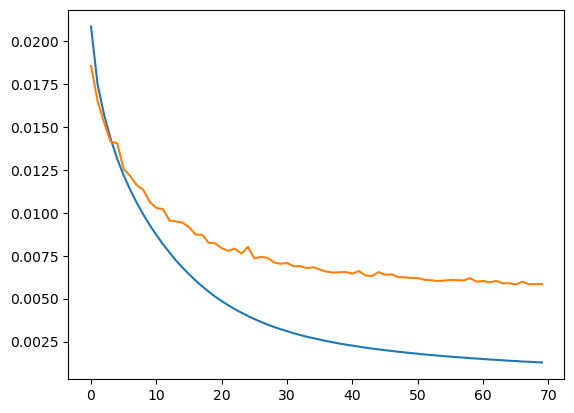

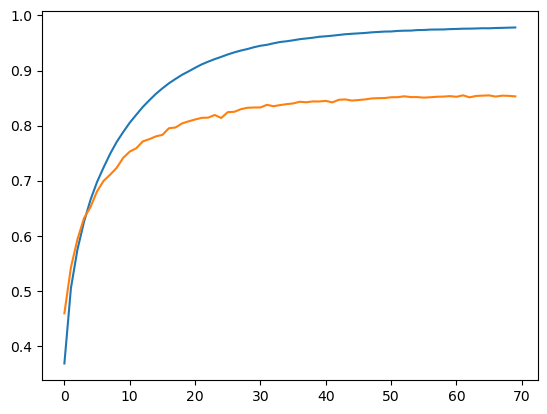

In [43]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.show()


plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.show()

## Pruebas grid search